In [2]:
asset <- read.table("/home/velikiyburyat/Downloads/GAZP_200205_210205.csv",header=TRUE,sep=',', row.names=1)
head(asset)
tail(asset)

,X.CLOSE.
,<dbl>
02/05/20,232.56
02/06/20,231.38
02/07/20,229.11
02/10/20,225.20
02/11/20,233.90
02/12/20,238.03


,X.CLOSE.
,<dbl>
01/29/21,212.83
02/01/21,214.66
02/02/21,214.42
02/03/21,218.10
02/04/21,219.79
02/05/21,222.01


In [9]:
asset_1 <- read.table("/home/velikiyburyat/Downloads/ALRS_200205_210205.csv",header=TRUE,sep=',', row.names=1)
head(asset_1)
tail(asset_1)

,X.CLOSE.
,<dbl>
02/05/20,84.39
02/06/20,83.71
02/07/20,84.53
02/10/20,82.05
02/11/20,82.18
02/12/20,82.78


,X.CLOSE.
,<dbl>
01/29/21,99.22
02/01/21,100.61
02/02/21,102.15
02/03/21,103.66
02/04/21,102.61
02/05/21,102.32


In [8]:
imoex<- read.table("/home/velikiyburyat/Downloads/IMOEX_200205_210205.csv",header=TRUE,sep=',',row.names = 1)
head(imoex)

,IMOEX
,<dbl>
2/5/2020,3114.25
2/6/2020,3096.68
2/7/2020,3087.63
2/10/2020,3062.41
2/11/2020,3097.58
2/12/2020,3122.27


In [182]:
tail(imoex)

,IMOEX
,<dbl>
1/29/2021,3277.08
2/1/2021,3291.14
2/2/2021,3360.25
2/3/2021,3343.46
2/4/2021,3372.00
2/5/2021,3392.73


In [183]:
library(PerformanceAnalytics)

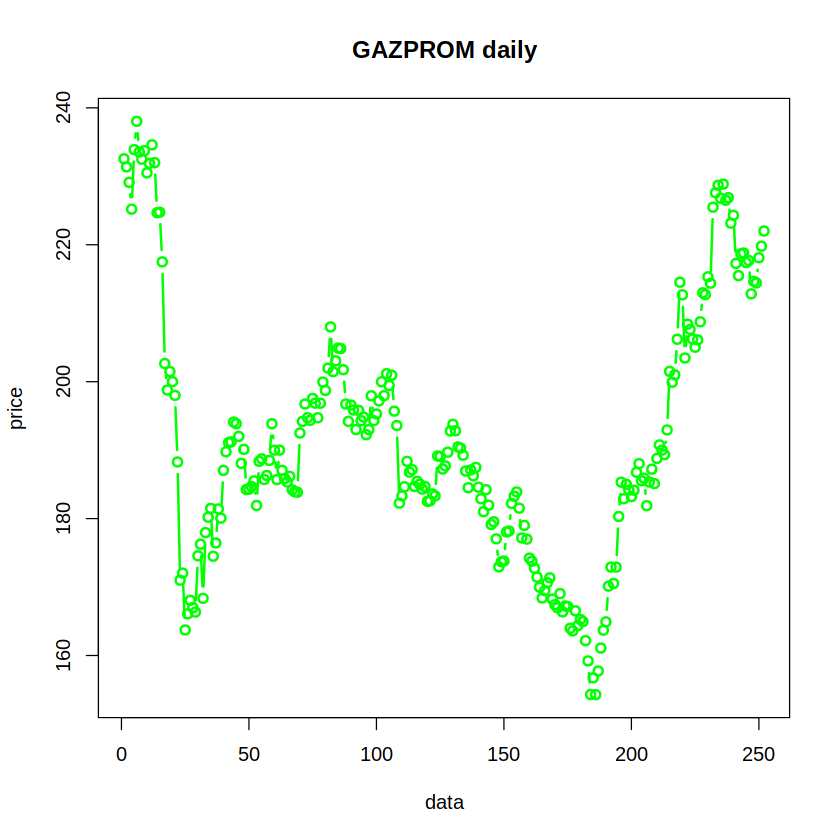

In [185]:
colnames(asset)<- c("GAZPROM")
plot(asset$GAZPROM,type = 'b',main="GAZPROM daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "price" )

In [186]:
colnames(asset_1)<- c("ALRS")
plot(asset_1&ALRS,type = 'b',main="ALRS daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "price" )

ERROR: Error in eval(expr, envir, enclos): object 'ALRS' not found


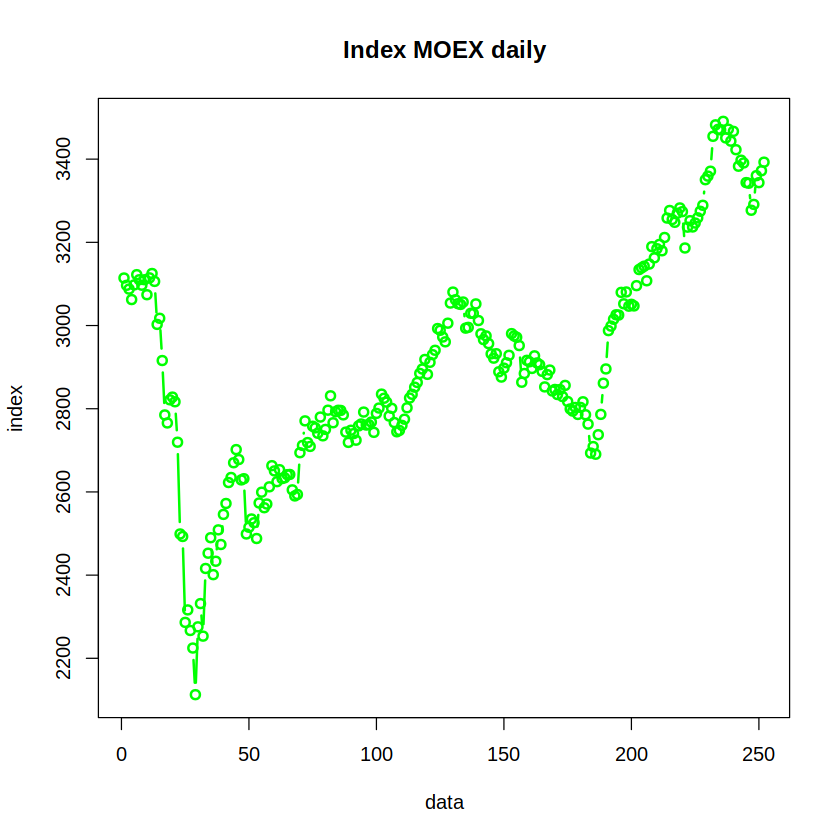

In [187]:
colnames(imoex)<- c("IMOEX")
plot(imoex$IMOEX,type = 'b',main="Index MOEX daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "index" )

In [188]:
Rf <-0.04


len<-  dim(asset)[1]
r1 <- diff(log(asset$GAZPROM))
r2 <- diff(log(imoex$IMOEX))
r3 <- diff(log(asset_1$ALRS))
rates <- cbind(r1,r2,r3)

In [189]:
colnames(rates)<- c("GAZPROM","IMOEX", "ALRS")
rownames(rates)<-as.character(as.Date(rownames(asset)[2:len],"%m/%d/%Y"))
head(rates)

,GAZPROM,IMOEX,ALRS
20-02-06,-0.005086876,-0.005657783,-0.008090466
20-02-07,-0.009859143,-0.002926764,0.009748056
20-02-10,-0.017213341,-0.008201619,-0.029777683
20-02-11,0.037904777,0.011418974,0.001583146
20-02-12,0.017503043,0.007939140,0.007274523
20-02-13,-0.019000529,-0.003921498,-0.015951632


In [190]:
tail(rates)

,GAZPROM,IMOEX,ALRS
21-01-29,-0.022624243,-0.019619640,-0.019759150
21-02-01,0.008561656,0.004281227,0.013912049
21-02-02,-0.001118673,0.020781367,0.015190665
21-02-03,0.017016965,-0.005009177,0.014673991
21-02-04,0.007718872,0.008499841,-0.010180919
21-02-05,0.010049881,0.006128867,-0.002830237


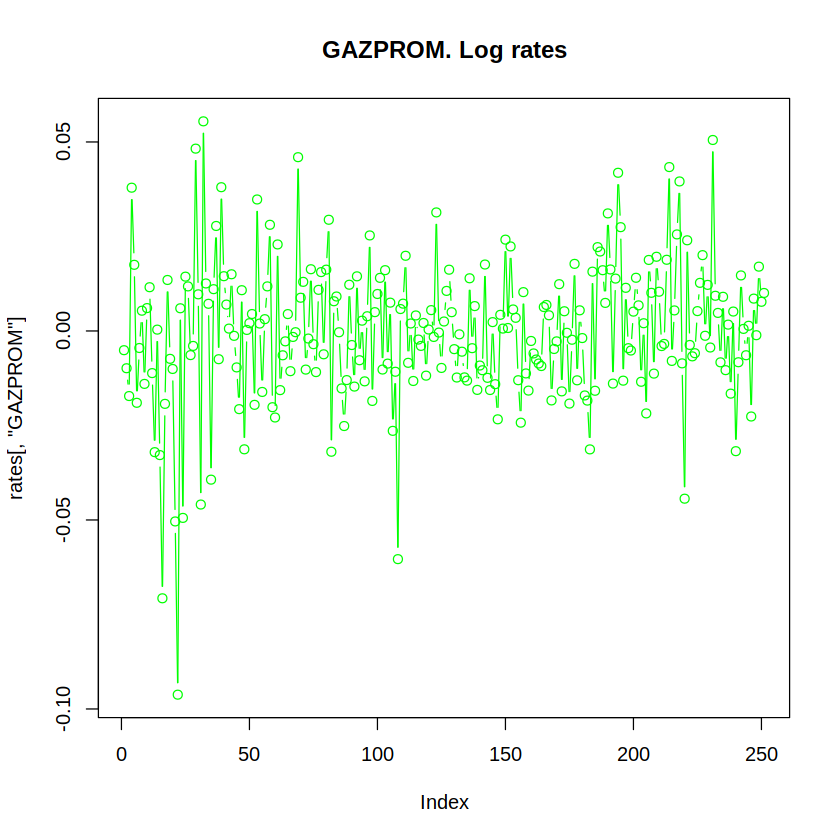

In [191]:
plot(rates[,'GAZPROM'],main= 'GAZPROM. Log rates',type ='b',pch =21,col = 'green')

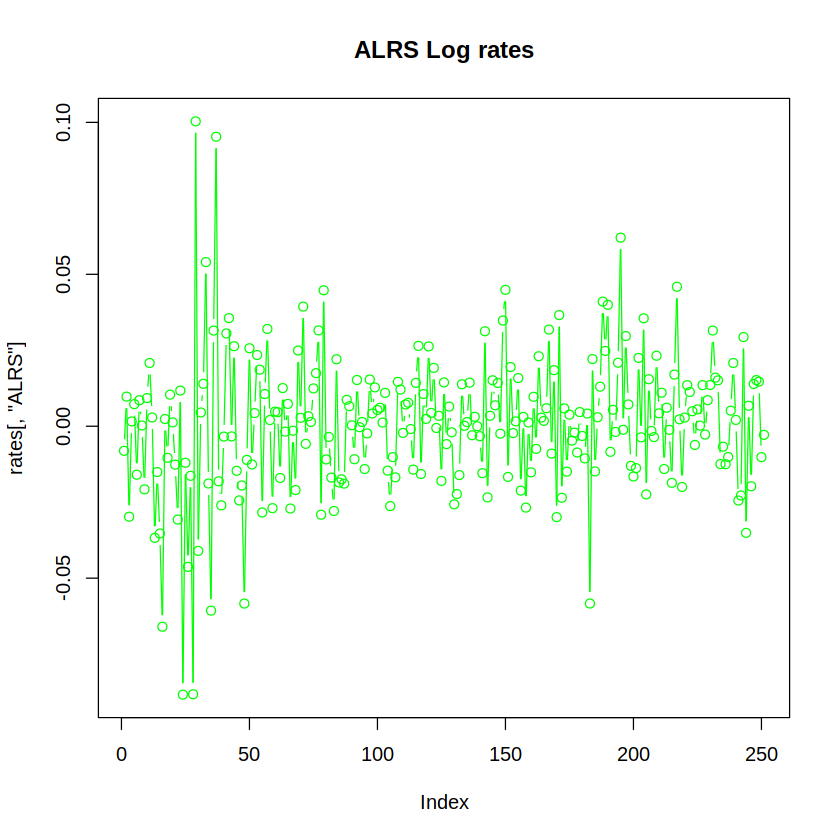

In [192]:
plot(rates[,'ALRS'],main= 'ALRS Log rates',type ='b',pch =21,col = 'green')

In [193]:
beta_manual <- cov(rates[, "GAZPROM"],rates[, "IMOEX"])/ var(rates[, "IMOEX"])
beta_manual

[1] 0.9014238

In [194]:
beta_manual_alrs <- cov(rates[, "ALRS"],rates[, "IMOEX"])/ var(rates[, "IMOEX"])
beta_manual_alrs

[1] 0.8595638

In [195]:
alpha_manual <- mean(rates[, "GAZPROM"])-Rf- beta_manual*(mean(rates[, "IMOEX"])- Rf)
alpha_manual

[1] -0.004435597

In [196]:
alpha_manual_alrs <- mean(rates[, "ALRS"])-Rf- beta_manual_alrs*(mean(rates[, "IMOEX"])- Rf)
alpha_manual_alrs

[1] -0.005143195

In [197]:
SharpeRatio(rates[, "GAZPROM"], Rf = Rf, p = 0.95, FUN = c("StdDev"))

"StdDev Sharpe (Rf=4%, p=95%):",-2.108102


In [198]:
SharpeRatio(rates[, "ALRS"], Rf = Rf, p = 0.95, FUN = c("StdDev"))

"StdDev Sharpe (Rf=4%, p=95%):",-1.708827


In [199]:
(qnorm(0.95,mean=0,sd=1))

[1] 1.644854

In [200]:
sd(rates[, "GAZPROM"]) * (qnorm(0.95,mean=0,sd=1))

[1] 0.03135446

In [203]:
sd(rates[, "ALRS"]) * (qnorm(0.95,mean=0,sd=1))

[1] 0.03776371

In [216]:
asset_n <- read.table("/home/velikiyburyat/Downloads/GAZP_200205_210205.csv",header=TRUE,sep=',')
asset_n[,1] = as.Date(asset_n[,1], format="%m/%d/%y")
head(asset_n)
tail(asset_n)

,X.DATE.,X.CLOSE.
,<date>,<dbl>
1,2020-02-05,232.56
2,2020-02-06,231.38
3,2020-02-07,229.11
4,2020-02-10,225.20
5,2020-02-11,233.90
6,2020-02-12,238.03


,X.DATE.,X.CLOSE.
,<date>,<dbl>
247,2021-01-29,212.83
248,2021-02-01,214.66
249,2021-02-02,214.42
250,2021-02-03,218.10
251,2021-02-04,219.79
252,2021-02-05,222.01


In [218]:
dif <- diff(asset_n[,2])
mean_dif <- mean(dif)
 
vol <- sd(dif)

In [220]:
alpha = 0.95
(VAR1 = qnorm(1-alpha,mean=mean_dif,sd=1)*vol)

[1] -6.146612

In [222]:
(VAR10 = qnorm(1-alpha,mean=mean_dif,sd=1))

[1] -1.686885

In [234]:
data_dif <- as.xts(dif,asset_n[2:length(asset_n[,1]),1])
head(data_dif)

            [,1]
2020-02-06 -1.18
2020-02-07 -2.27
2020-02-10 -3.91
2020-02-11  8.70
2020-02-12  4.13
2020-02-13 -4.48

In [235]:
(VaR(data_dif, p=.95, method="historical"))

VaR calculation produces unreliable result (risk over 100%) for column: 1 : 5.55



VaR,-1


In [236]:
(-1*quantile(data_dif,c(.05,.95)))

5%   95% 
 5.55 -5.29

In [232]:
ES(rates, p=.95, method="historical")

,GAZPROM,IMOEX,ALRS
ES,-0.04743915,-0.04438307,-0.05192367


In [233]:
ES(rates, p=.95, method="gaussian")

,GAZPROM,IMOEX,ALRS
ES,-0.03942631,-0.03396377,-0.04649523
